## Basic Quantum Algorithms - Codebook Map

### Deutsch-Josza Algorithm

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml

In [ ]:
## Uniform superposition over n qubits

n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def naive_circuit():
    
    """Create a uniform superposition and return the probabilities.

    Returns: 
        array[float]: Probabilities for observing different outcomes.
    """
    for wire in range(n_bits):

        qml.Hadamard(wires=wire)

    return qml.probs(wires=range(n_bits))

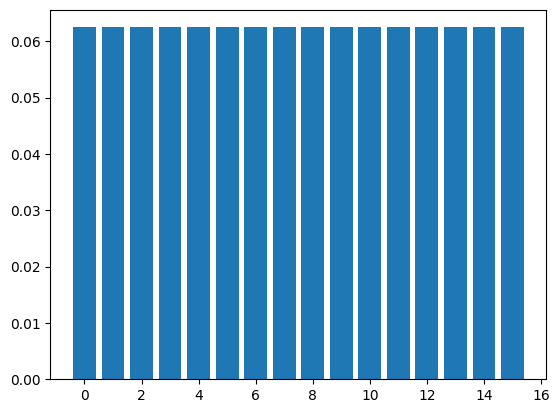

In [5]:
result = naive_circuit()
plt.bar(range(len(result)), result)
plt.show()

In [ ]:
def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix
    my_array[index, index] = -1

    return my_array

print(oracle_matrix([1, 0, 1, 0]))

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 

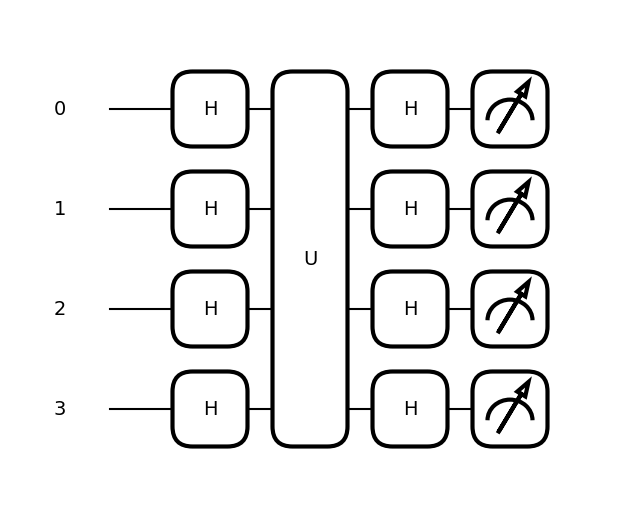

In [ ]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def hoh_circuit(combo):
    """A circuit which applies Hadamard-oracle-Hadamard and returns probabilities.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: Measurement outcome probabilities.
    """
    for wire in range(n_bits):
        qml.Hadamard(wires=wire)
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
    for wire in range(n_bits):
        qml.Hadamard(wires=wire)
    
    return qml.probs(wires=range(n_bits))


qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(hoh_circuit)([1, 0, 1, 0])
plt.show()

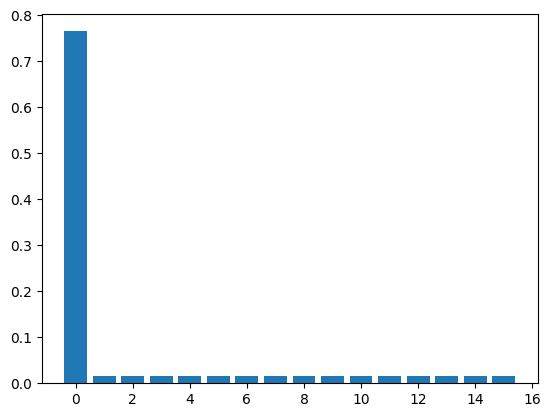

In [60]:
result = hoh_circuit([1, 0, 0, 0])
plt.bar(range(len(result)), result)
plt.show()

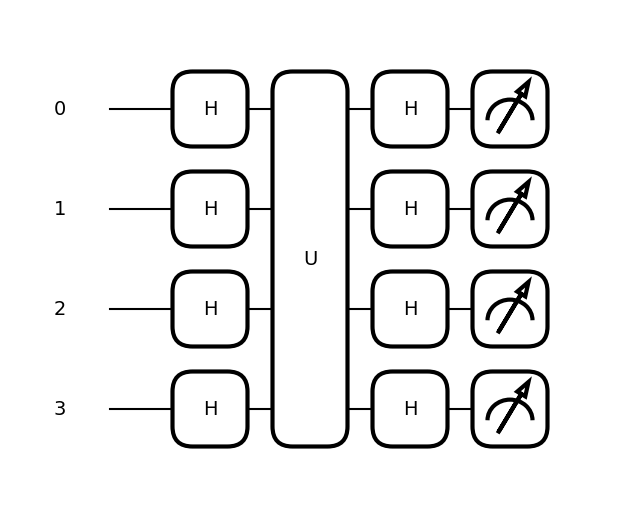

In [62]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

def multisol_oracle_matrix(combos):
    """Return the oracle matrix for a set of solutions.

    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    indices = [np.ravel_multi_index(combo, [2]*len(combo)) for combo in combos]
    my_array = np.identity(2**len(combos[0])) # Create the identity matrix
    for index in indices:
        my_array[index, index] = -1

    return my_array


@qml.qnode(dev)
def multisol_hoh_circuit(combos):
    """A circuit which applies Hadamard, multi-solution oracle, then Hadamard.
    
    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns: 
        array[float]: Probabilities for observing different outcomes.
    """

    for wire in range(n_bits):
        qml.Hadamard(wires=wire)
    qml.QubitUnitary(multisol_oracle_matrix(combos), wires=range(n_bits))
    for wire in range(n_bits):
        qml.Hadamard(wires=wire)

    return qml.probs(wires=range(n_bits))


qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(multisol_hoh_circuit)([[1, 0, 1, 0]])
plt.show()

In [67]:
def deutsch_jozsa(promise_var):
    """Implement the Deutsch–Jozsa algorithm and guess the promise variable.
    
    Args:
        promise_var (int): Indicates whether the function is balanced (0) or constant (1).
        
    Returns: 
        int: A guess at the promise variable.
    """
    if promise_var == 0:
        how_many = 2**(n_bits - 1)
    else:
        how_many = np.random.choice([0, 2**n_bits]) # Choose all or nothing randomly
    combos = [[1,0,0,0],[0,0,0,0]] # Generate random combinations
    zero_prob = multisol_hoh_circuit(combos)[0] # Probability of observing the all-zero state
    guess = int(np.rint(zero_prob)) # Round to nearest integer
    return guess
